Practice the geopandas

In [22]:
import geopandas
from geodatasets import get_path

path_to_data = get_path("nybb")
gdf = geopandas.read_file(path_to_data)

In [23]:
gdf

BoroCode       BoroName     Shape_Leng    Shape_Area  \
0         5  Staten Island  330470.010332  1.623820e+09   
1         4         Queens  896344.047763  3.045213e+09   
2         3       Brooklyn  741080.523166  1.937479e+09   
3         1      Manhattan  359299.096471  6.364715e+08   
4         2          Bronx  464392.991824  1.186925e+09   

                                            geometry  
0  MULTIPOLYGON (((970217.022 145643.332, 970227....  
1  MULTIPOLYGON (((1029606.077 156073.814, 102957...  
2  MULTIPOLYGON (((1021176.479 151374.797, 102100...  
3  MULTIPOLYGON (((981219.056 188655.316, 980940....  
4  MULTIPOLYGON (((1012821.806 229228.265, 101278...

In [ ]:
# this saves the data
gdf.to_file("file.geojson", driver="GeoJSON")

In [13]:
print(gdf.columns)

Index(['BoroCode', 'Shape_Leng', 'Shape_Area', 'geometry'], dtype='object')


In [24]:
#Area
gdf = gdf.set_index('BoroName')
gdf['area'] = gdf.area
gdf['area']

BoroName
Staten Island    1.623822e+09
Queens           3.045214e+09
Brooklyn         1.937478e+09
Manhattan        6.364712e+08
Bronx            1.186926e+09
Name: area, dtype: float64

In [25]:
gdf["boundary"] = gdf.boundary
gdf["boundary"]

BoroName
Staten Island    MULTILINESTRING ((970217.022 145643.332, 97022...
Queens           MULTILINESTRING ((1029606.077 156073.814, 1029...
Brooklyn         MULTILINESTRING ((1021176.479 151374.797, 1021...
Manhattan        MULTILINESTRING ((981219.056 188655.316, 98094...
Bronx            MULTILINESTRING ((1012821.806 229228.265, 1012...
Name: boundary, dtype: geometry

In [26]:
gdf["centroid"] = gdf.centroid
gdf["centroid"]

BoroName
Staten Island      POINT (941639.45 150931.991)
Queens           POINT (1034578.078 197116.604)
Brooklyn          POINT (998769.115 174169.761)
Manhattan         POINT (993336.965 222451.437)
Bronx              POINT (1021174.79 249937.98)
Name: centroid, dtype: geometry

In [27]:
#measuring the distance
first_point = gdf["centroid"].iloc[0]
gdf["distance"] = gdf["centroid"].distance(first_point)
gdf["distance"]

BoroName
Staten Island         0.000000
Queens           103781.535276
Brooklyn          61674.893421
Manhattan         88247.742789
Bronx            126996.283623
Name: distance, dtype: float64

In [28]:
gdf["distance"].mean()

np.float64(76140.09102166798)

<h3>Making Maps</h3>

<Axes: >

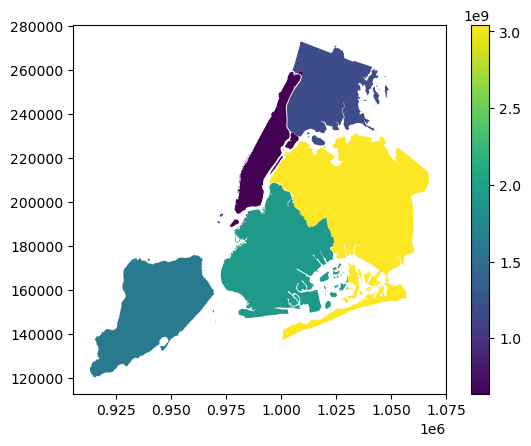

In [29]:
gdf.plot("area", legend=True)

In [31]:
gdf.explore("area", legend=False)

<Axes: >

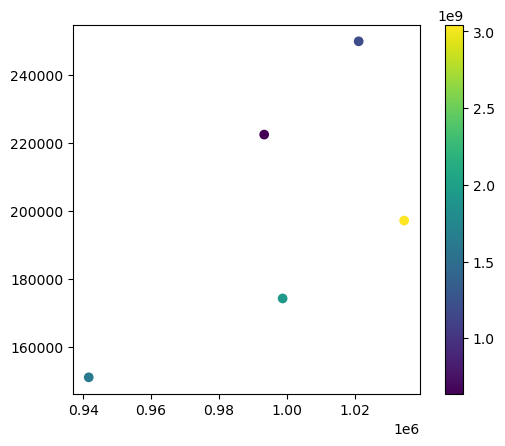

In [33]:
gdf = gdf.set_geometry("centroid")
gdf.plot("area", legend=True)

<Axes: >

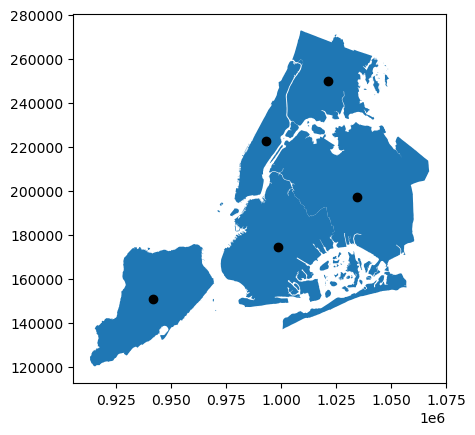

In [36]:
ax = gdf["geometry"].plot()
gdf["centroid"].plot(ax=ax, color="black")

<Axes: >

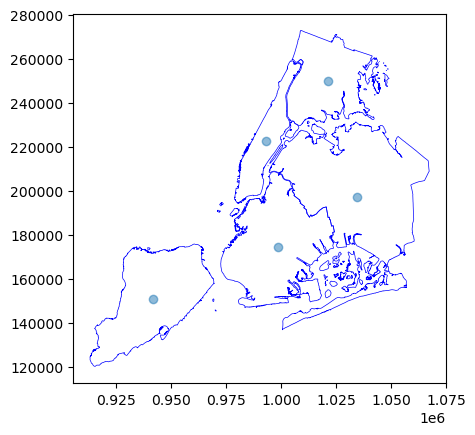

In [43]:
gdf["convex_hull"] = gdf.convex_hull
# saving the first plot as an axis and setting alpha (transparency) to 0.5
ax = gdf["convex_hull"].plot(alpha=0.5)
# passing the first plot and setting linewidth to 0.5
gdf["boundary"].plot(ax=ax, color="blue", linewidth=0.5)

<Axes: >

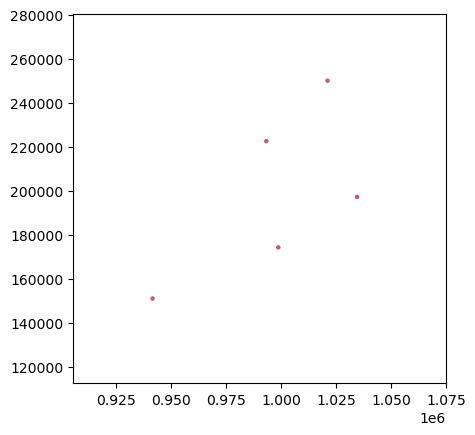

In [44]:
#buffering
gdf["buffered"] = gdf.buffer(1000)
gdf["buffered_centroid"] = gdf["centroid"].buffer(1000)

ax = gdf["buffered"].plot(alpha=0.5)
gdf["buffered_centroid"].plot(ax=ax, color="red", alpha=0.5)
gdf["boundary"].plot(ax=ax, color="white", linewidth=0.5)

Geometry Relations

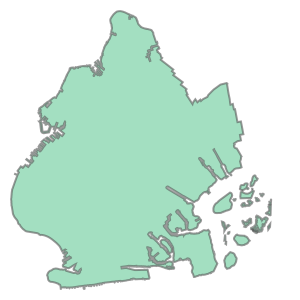

In [45]:
brooklyn = gdf.loc["Brooklyn", "geometry"]
brooklyn

In [46]:
type(brooklyn)

shapely.geometry.multipolygon.MultiPolygon

In [47]:
gdf["buffered"].intersects(brooklyn)

BoroName
Staten Island    False
Queens           False
Brooklyn          True
Manhattan        False
Bronx            False
dtype: bool

KeyError: 'within'

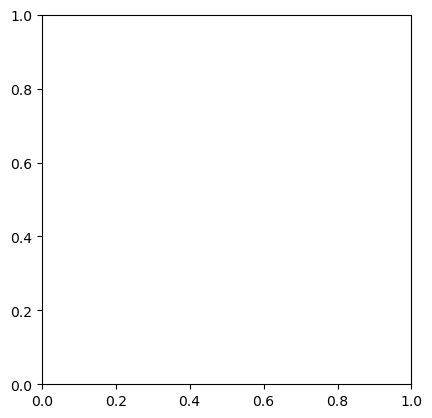

In [52]:
gdf = gdf.set_geometry("buffered_centroid")
ax = gdf.plot(
  column="within", length=True, categorical=True, legend_kwds={"loc": "upper left"}
)
gdf["boundary"].plot(ax=ax, color="black", linewidth=0.5)

In [54]:
print(gdf.columns)
gdf.boundary #for checking

Index(['BoroCode', 'Shape_Leng', 'Shape_Area', 'geometry', 'area', 'boundary',
       'centroid', 'distance', 'convex_hull', 'buffered', 'buffered_centroid'],
      dtype='object')


BoroName
Staten Island    LINESTRING (942639.45 150931.991, 942634.635 1...
Queens           LINESTRING (1035578.078 197116.604, 1035573.26...
Brooklyn         LINESTRING (999769.115 174169.761, 999764.299 ...
Manhattan        LINESTRING (994336.965 222451.437, 994332.15 2...
Bronx            LINESTRING (1022174.79 249937.98, 1022169.974 ...
dtype: geometry

Projections

In [58]:
gdf.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US survey foot)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

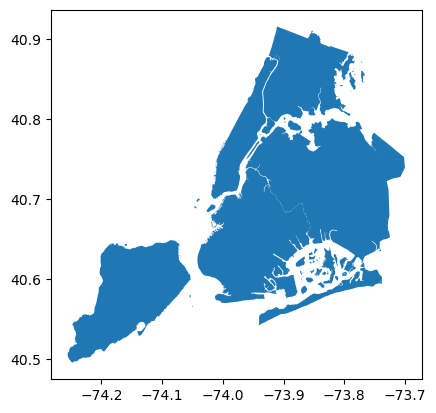

In [ ]:
#this will change the projections
gdf = gdf.set_geometry("geometry")
boroughs_4326 = gdf.to_crs("EPSG:4326")
boroughs_4326.plot()

In [57]:
boroughs_4326.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich